In [ ]:
# 오버피팅은 주로 다음의 두 경우에 일어난다.
'''
1. 매개변수가 많고 표현력이 높은 모델
2. 훈련데이터가 적음
'''

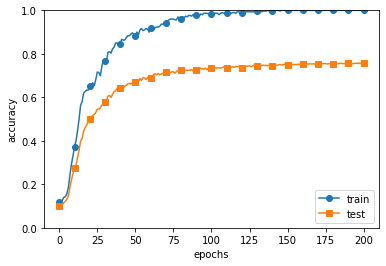

In [10]:
# 위의 두 조건을 충족하여 일부러 오버피팅을 일으킨 예

import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터를 60,000개에서 300개로 줄임(훈련데이터 적음)
x_train = x_train[:300]
t_train = t_train[:300]


#weight_decay_lambda = 0
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10) # weight_decay_lambda=weight_decay_lambda
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = [] # 에폭 단위의 정확도 저장
test_acc_list = [] # 에폭 단위의 정확도 저장

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

#         print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [2]:
# 결과를 살펴보면, 훈련 데이터에는 100에폭을 지나는 시점부터 거의 100%이지만, 시험데이터는 75%가량에 머무른다.
# 이처럼 정확도가 크게 벌어지는 것은 훈련데이터에만 적응fitting해버린 결과이다.

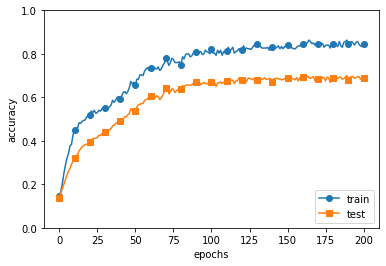

In [9]:
# 가중치 감소weight decay 이용
# 학습과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제한다.
# 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.
# 손실함수에 가중치의 L2노름을 더하여 가중치를 감소시킨다.

import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터를 60,000개에서 300개로 줄임(훈련데이터 적음)
x_train = x_train[:300]
t_train = t_train[:300]

# 람다를 크게 설정할 수록 큰 가중치에 대한 페널티가 커진다.
#weight_decay_lambda = 0
weight_decay_lambda = 0.1 
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, weight_decay_lambda=weight_decay_lambda) 
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = [] # 에폭 단위의 정확도 저장
test_acc_list = [] # 에폭 단위의 정확도 저장

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

#         print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [4]:
# 훈련 데이터와 시험 데이터에 대한 각각의 정확도는 차이가 있지만, 가중치 감소를 이용하지 않았을 때에 비하면 차이가 줄었다(오버피팅이 억제되었다)
# 또한, 앞서와 달리 훈련 데이터에 대한 정확도가 100%(1.0)에 도달하지 못하였다.

In [ ]:
# 가중치 감소는 간단하게 구현할 수 있고, 오버피팅을 어느 정도 억제할 수 있으나, 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어렵다.
# 이럴 때에는 드롭아웃Dropout이라는 기법을 사용한다.

# 드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법
'''
훈련때 은닉층의 뉴런을 무작위로 골라 삭제(dropout)한다.
삭제된 뉴런은 더이상 신호를 전달하지 않게 된다.
훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달한다.
단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안한 비율을 곱하여 출력한다.
'''

In [5]:
# 드롭아웃 구현
# 되도록 이해하기 쉽게 구현했음.
# 훈련 시 순전파 때 노드를 잘 삭제해두기만 하면,시험 시 순전파 때 삭제 안 한 노드의 비율을 곱하지 않아도 됨(False로 처리되어 알아서 거르고 계산해준다)

class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    
    def forward(self, x, train_flg=True):
        if train_flg: # 훈련 시
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio # x와 형상이 같은 배열을 무작위로 생성 후, 그 값이 dropout_ratio보다 큰 원소만 True로 설정(삭제할 뉴런은 False)
            return x * self.mask
        else: # 시험 시
            return x * (1.0 - self.dropout_ratio) # 훈련때 잘 삭제되었으면 굳이 삭제 안한 비율을 곱해주지 않아도 된다.
    
    def backward(self, dout):
        return dout * self.mask # 역전파 동작은 ReLU와 같음. 순전파 때 신호를 통과시키는 뉴런은 역전파때도 통과, 순전파 때 그렇지 않은 뉴런은 역전파 때도 통과하지 못함.

train loss:2.2772312560217465
=== epoch:1, train acc:0.1, test acc:0.081 ===
train loss:2.295319788361045
train loss:2.286789070034149
train loss:2.292242735747316
=== epoch:2, train acc:0.10333333333333333, test acc:0.0826 ===
train loss:2.2875085781249926
train loss:2.2898924692405136
train loss:2.295072913801823
=== epoch:3, train acc:0.11, test acc:0.0832 ===
train loss:2.2742501402831894
train loss:2.2984043603766673
train loss:2.279944015739992
=== epoch:4, train acc:0.11333333333333333, test acc:0.086 ===
train loss:2.2965488370209686
train loss:2.2927948509245333
train loss:2.2708728163029592
=== epoch:5, train acc:0.12666666666666668, test acc:0.0886 ===
train loss:2.289646442449182
train loss:2.2772324171272795
train loss:2.2892550204145556
=== epoch:6, train acc:0.13, test acc:0.0913 ===
train loss:2.279269701504089
train loss:2.29080813218458
train loss:2.2849204271476258
=== epoch:7, train acc:0.13333333333333333, test acc:0.0954 ===
train loss:2.283123596975991
train loss

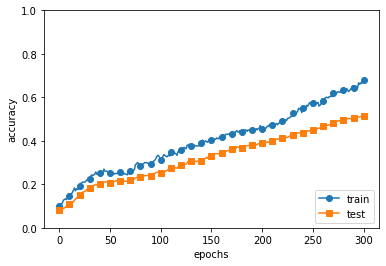

In [13]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
#from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

# Dropout 
use_dropout = True  # Dropout활성화
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [14]:
# 드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다.
# 또, 훈련 데이터에 대한 정확도가 100%에 도달하지도 않았다(오버피팅 억제)
# 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

# 기계학습에서는 앙상블 학습ensemble learning을 사용한다.
# 앙상블 학습은 개별적으로 학습시킨 서로 다른 여러 모델의 출력을 평균내어 추론하는 방식이다.
# 드롭아웃은 각 뉴런을 무작위로 삭제하는 행위를 통해 매번 다른 모델을 만들어 학습시키는 것으로 볼 수 있다.
# 그리고 추론 때는 뉴런의 출력에 삭제한 비율을 곱함으로써, 앙상블 학습에서 여러 모델의 출력 평균을 내는 것과 같은 효과를 얻는다.
# 따라서 드롭아웃은, 하나의 네트워크에서 앙상블 학습과 같은 효과를 구현했다고 볼 수 있다.